### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=[15,8]

In [2]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions

### Dataset

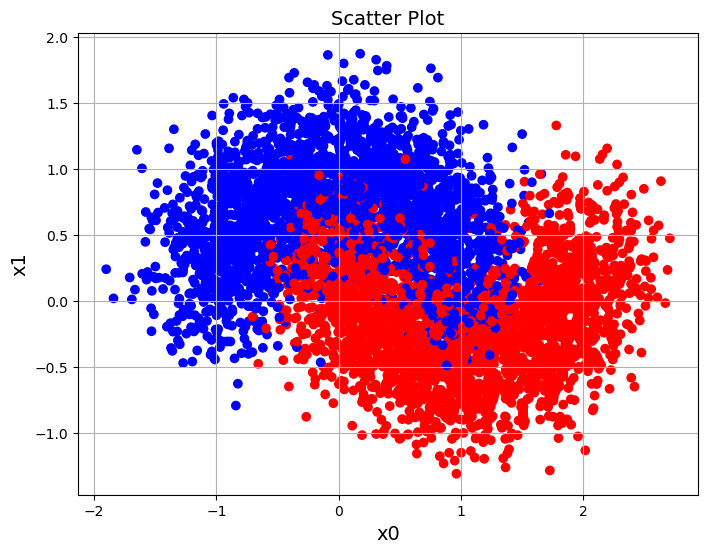

In [3]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 5000, noise = 0.3, 
                  random_state=42)

colors = ["blue" if label == 0 else "red" for label in y]

plt.figure(figsize=(8, 6))

plt.scatter(X[:, 0], X[:, 1], color = colors)
plt.xlabel("x0", fontsize = 14)
plt.ylabel("x1", fontsize=14)
plt.title("Scatter Plot", fontsize=14)
plt.grid();

In [4]:
X

array([[ 0.26279348,  1.20967929],
       [ 0.08942439, -0.03610362],
       [ 0.07904712,  0.37332342],
       ...,
       [ 0.48738363,  0.32822332],
       [ 1.3805686 , -0.34533826],
       [ 0.25172622,  1.00697298]])

In [5]:
y

array([0, 1, 1, ..., 1, 1, 0])

**Since this is non linear classification problem, the linear kernel does not work properly, We get a very poor accuracy since it can't be linearly classified, We might get better results with RBF and poly kernel, lets try with different values of 'c' and 'gamma'.**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [8]:
# create a generalized function to calculate the performance metrics values for test set
def get_train_score(model, train_data):
    train_pred = model.predict(train_data)
    return(accuracy_score(y_train, train_pred))

In [9]:
# create a generalized function to calculate the performance metrics values for test set
def get_test_score(model, test_data):
    test_pred = model.predict(test_data)
    return(accuracy_score(y_test, test_pred))

### Kernel = Linear

In [10]:
model_L_10 = SVC(kernel="linear", C=10)
model_L_10.fit(X_train_scaled, y_train)

SVC(C=10, kernel='linear')

In [11]:
get_train_score(model_L_10, train_data = X_train_scaled)

0.8488571428571429

In [12]:
get_test_score(model_L_10, test_data = X_test_scaled)

0.8633333333333333

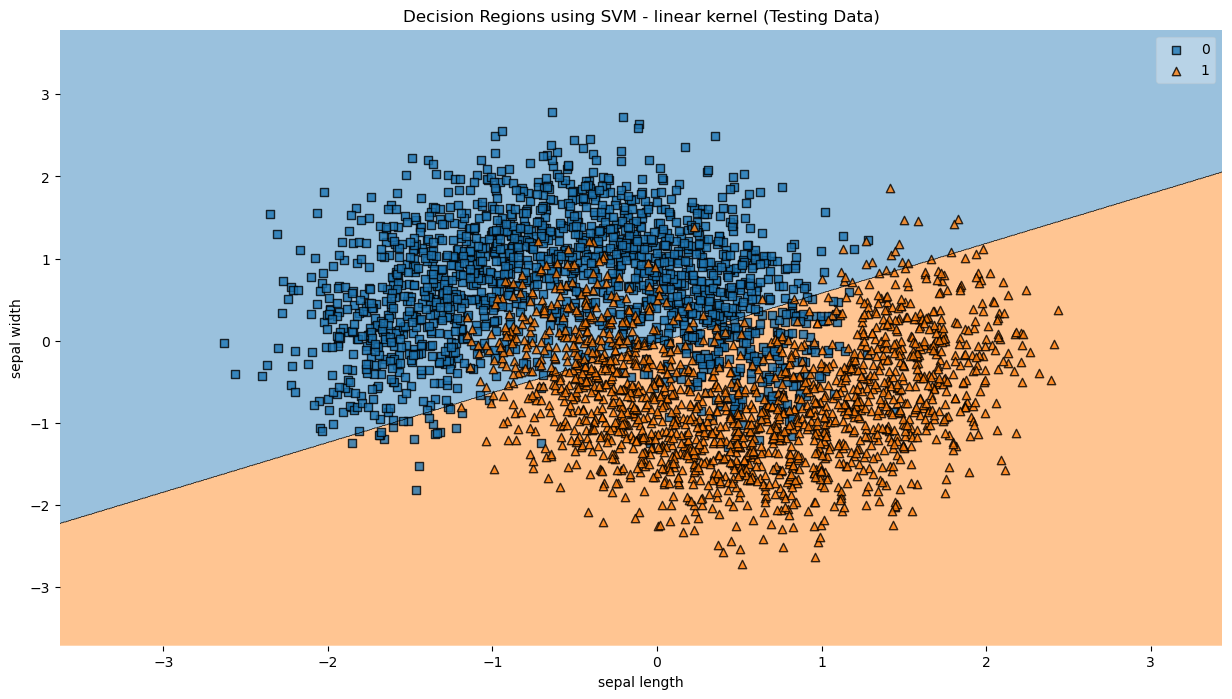

In [13]:
plot_decision_regions(X_train_scaled, y_train, clf = model_L_10)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Decision Regions using SVM - linear kernel (Testing Data)');

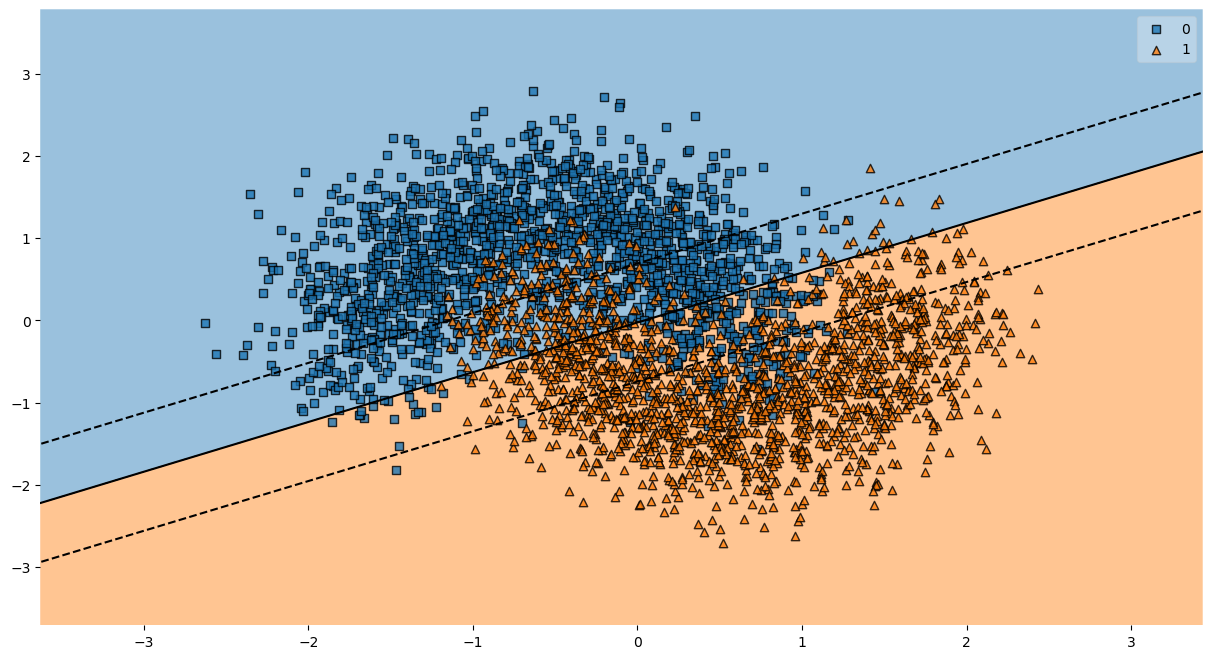

In [14]:
ax = plt.gca()
xx = np.linspace(-4, 4, 30)
yy = np.linspace(-4, 4, 30)

YY, XX = np.meshgrid(yy, xx)

xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = model_L_10.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors = 'k', levels = [-1, 0, 1], linestyles=["--", "-", "--"])

plot_decision_regions(X_train_scaled, y_train, clf = model_L_10);

In [15]:
model_L_100 = SVC(kernel="linear", C=100)
model_L_100.fit(X_train_scaled, y_train)

SVC(C=100, kernel='linear')

In [16]:
get_train_score(model_L_100, train_data=X_train_scaled)

0.8488571428571429

In [17]:
get_test_score(model_L_100, test_data=X_test_scaled)

0.8633333333333333

In [18]:
model_L_500 = SVC(kernel="linear", C=500)
model_L_500.fit(X_train_scaled, y_train)

SVC(C=500, kernel='linear')

In [19]:
get_train_score(model_L_500, train_data=X_train_scaled)

0.8488571428571429

In [20]:
get_test_score(model_L_500, test_data=X_test_scaled)

0.8633333333333333

In [21]:
model_L_1000 = SVC(kernel="linear", C=1000)
model_L_1000.fit(X_train_scaled, y_train)

SVC(C=1000, kernel='linear')

In [22]:
get_train_score(model_L_1000, train_data=X_train_scaled)

0.8488571428571429

In [23]:
get_test_score(model_L_1000, test_data=X_test_scaled)

0.8633333333333333

In [24]:
df = pd.DataFrame(columns = ['Model', 'Kernel', 'C_value', 'train_accuracy_score', 'test_accuracy_score'])
df

,Model,Kernel,C_value,train_accuracy_score,test_accuracy_score


In [25]:
model_linear = pd.Series({'Model': 'model_L_10',
                     'Kernel': 'Linear',
                     'C_value': 10,
                     'train_accuracy_score': accuracy_score(y_train, model_L_10.predict(X_train_scaled)),
                     'test_accuracy_score': accuracy_score(y_test, model_L_10.predict(X_test_scaled))
                   })

# append the values to the result table
df = df.append(model_linear, ignore_index = True)

# print the result table
df

,Model,Kernel,C_value,train_accuracy_score,test_accuracy_score
0,model_L_10,Linear,10,0.848857,0.863333


In [26]:
model_linear1 = pd.Series({'Model': 'model_L_100',
                     'Kernel': 'Linear',
                     'C_value': 100,
                     'train_accuracy_score': accuracy_score(y_train, model_L_100.predict(X_train_scaled)),
                     'test_accuracy_score': accuracy_score(y_test, model_L_100.predict(X_test_scaled))
                   })

# append the values to the result table
df = df.append(model_linear1, ignore_index = True)

# print the result table
df

,Model,Kernel,C_value,train_accuracy_score,test_accuracy_score
0,model_L_10,Linear,10,0.848857,0.863333
1,model_L_100,Linear,100,0.848857,0.863333


In [27]:
model_linear2 = pd.Series({'Model': 'model_L_500',
                     'Kernel': 'Linear',
                     'C_value': 500,
                     'train_accuracy_score': accuracy_score(y_train, model_L_500.predict(X_train_scaled)),
                     'test_accuracy_score': accuracy_score(y_test, model_L_500.predict(X_test_scaled))
                   })

# append the values to the result table
df = df.append(model_linear2, ignore_index = True)

# print the result table
df

,Model,Kernel,C_value,train_accuracy_score,test_accuracy_score
0,model_L_10,Linear,10,0.848857,0.863333
1,model_L_100,Linear,100,0.848857,0.863333
2,model_L_500,Linear,500,0.848857,0.863333


In [28]:
model_linear3 = pd.Series({'Model': 'model_L_1000',
                     'Kernel': 'Linear',
                     'C_value': 1000,
                     'train_accuracy_score': accuracy_score(y_train, model_L_1000.predict(X_train_scaled)),
                     'test_accuracy_score': accuracy_score(y_test, model_L_1000.predict(X_test_scaled))
                   })

# append the values to the result table
df = df.append(model_linear3, ignore_index = True)

# print the result table
df

,Model,Kernel,C_value,train_accuracy_score,test_accuracy_score
0,model_L_10,Linear,10,0.848857,0.863333
1,model_L_100,Linear,100,0.848857,0.863333
2,model_L_500,Linear,500,0.848857,0.863333
3,model_L_1000,Linear,1000,0.848857,0.863333


`Inference`:
- Basically, this is involving some rework, but if get all the values to compare, it becomes easy to interpret. We can hardly see any change in the train and test accuracy scores for the linear kernel. The reason is this is non linear classification problem, we cannot get results using a linear kernel, it cannot divide the data properly.

### Kernel = Poly

In [29]:
model_P_3 = SVC(kernel="poly", degree = 3, C=10)
model_P_3.fit(X_train_scaled, y_train)

SVC(C=10, kernel='poly')

In [30]:
get_train_score(model_P_3, train_data=X_train_scaled)

0.8485714285714285

In [31]:
get_test_score(model_P_3, test_data=X_test_scaled)

0.8586666666666667

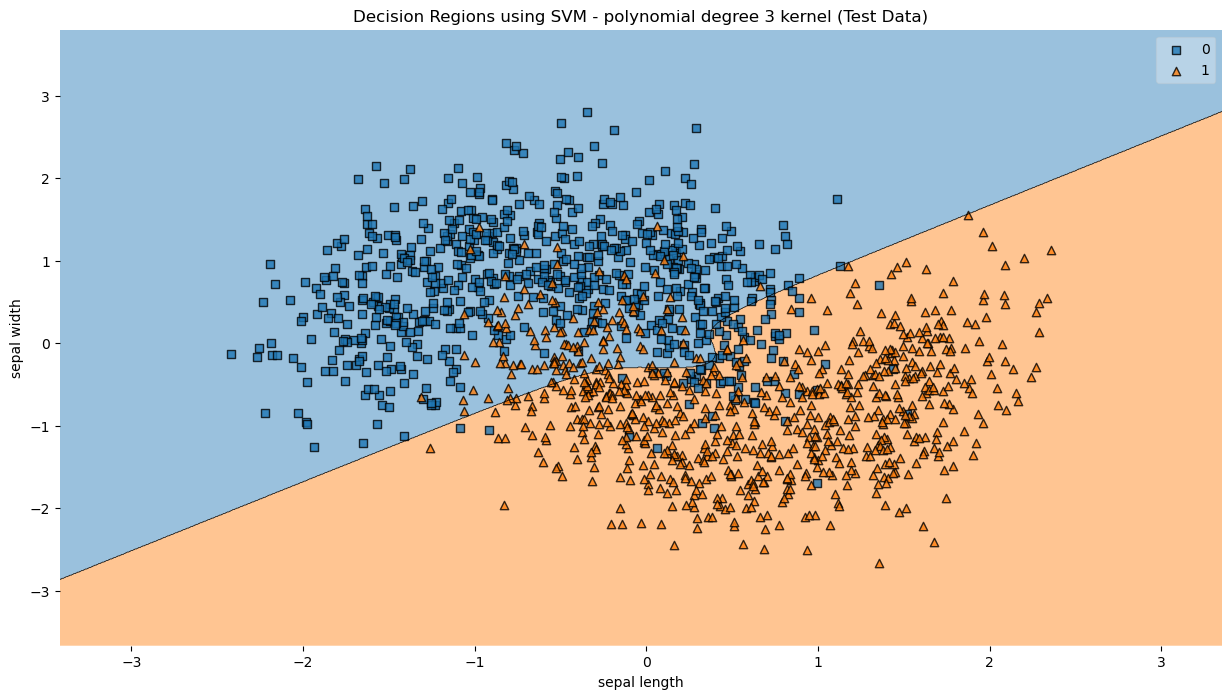

In [32]:
plot_decision_regions(X_test_scaled, y_test, clf = model_P_3)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Decision Regions using SVM - polynomial degree 3 kernel (Test Data)');

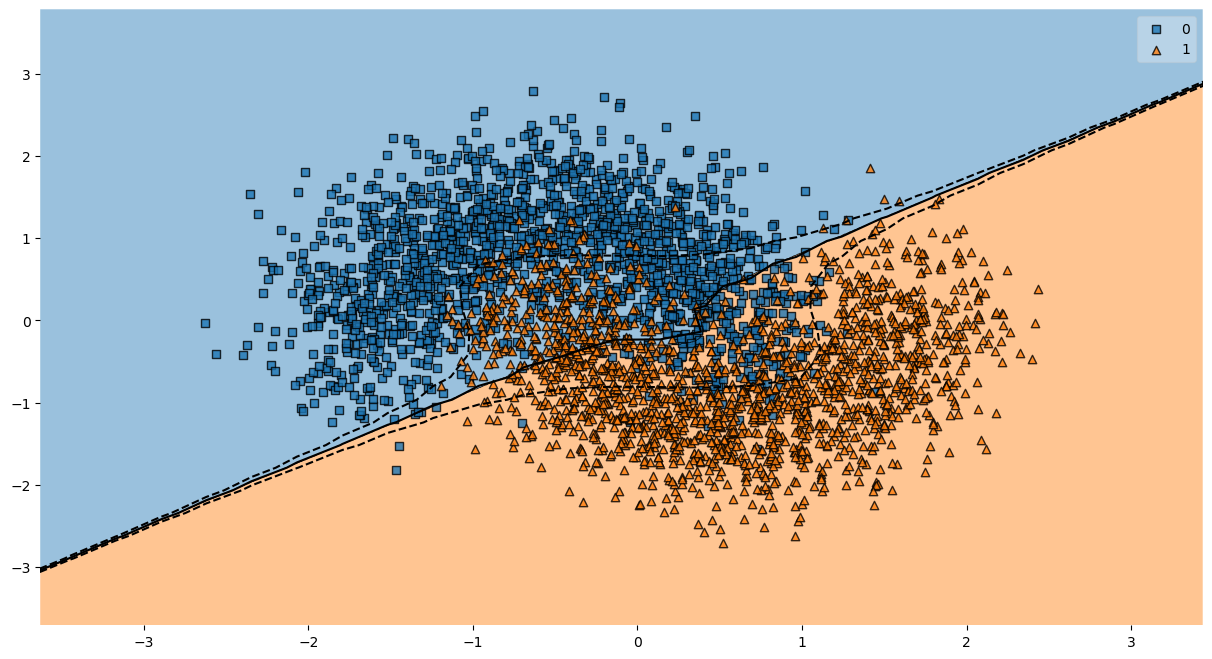

In [33]:
ax = plt.gca()
xx = np.linspace(-4, 4, 30)
yy = np.linspace(-4, 4, 30)

YY, XX = np.meshgrid(yy, xx)

xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = model_P_3.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors = 'k', levels = [-1, 0, 1], linestyles=["--", "-", "--"])

plot_decision_regions(X_train_scaled, y_train, clf = model_P_3);

In [34]:
df_poly = pd.DataFrame(columns = ['Model', 'Kernel', 'degree', 'C_value', 'train_accuracy_score', 'test_accuracy_score'])
df_poly

,Model,Kernel,degree,C_value,train_accuracy_score,test_accuracy_score


In [35]:
model_poly1 = pd.Series({'Model': 'model_P_3',
                     'Kernel': 'Linear',
                    'degree':3,
                     'C_value': 10,
                     'train_accuracy_score': accuracy_score(y_train, model_P_3.predict(X_train_scaled)),
                     'test_accuracy_score': accuracy_score(y_test, model_P_3.predict(X_test_scaled))
                   })

# append the values to the result table
df_poly = df_poly.append(model_poly1, ignore_index = True)

# print the result table
df_poly

,Model,Kernel,degree,C_value,train_accuracy_score,test_accuracy_score
0,model_P_3,Linear,3,10,0.848571,0.858667


In [36]:
model_P_5 = SVC(kernel="poly", degree = 5, C=100)
model_P_5.fit(X_train_scaled, y_train)

SVC(C=100, degree=5, kernel='poly')

In [37]:
model_poly2 = pd.Series({'Model': 'model_P_5',
                     'Kernel': 'Linear',
                    'degree':5,
                     'C_value': 100,
                     'train_accuracy_score': accuracy_score(y_train, model_P_5.predict(X_train_scaled)),
                     'test_accuracy_score': accuracy_score(y_test, model_P_5.predict(X_test_scaled))
                   })

# append the values to the result table
df_poly = df_poly.append(model_poly2, ignore_index = True)

# print the result table
df_poly

,Model,Kernel,degree,C_value,train_accuracy_score,test_accuracy_score
0,model_P_3,Linear,3,10,0.848571,0.858667
1,model_P_5,Linear,5,100,0.845714,0.846667


In [38]:
model_P_7 = SVC(kernel="poly", degree = 7, C=100)
model_P_7.fit(X_train_scaled, y_train)

SVC(C=100, degree=7, kernel='poly')

In [39]:
model_poly3 = pd.Series({'Model': 'model_P_7',
                     'Kernel': 'Linear',
                    'degree':7,
                     'C_value': 100,
                     'train_accuracy_score': accuracy_score(y_train, model_P_7.predict(X_train_scaled)),
                     'test_accuracy_score': accuracy_score(y_test, model_P_7.predict(X_test_scaled))
                   })

# append the values to the result table
df_poly = df_poly.append(model_poly3, ignore_index = True)

# print the result table
df_poly

,Model,Kernel,degree,C_value,train_accuracy_score,test_accuracy_score
0,model_P_3,Linear,3,10,0.848571,0.858667
1,model_P_5,Linear,5,100,0.845714,0.846667
2,model_P_7,Linear,7,100,0.835143,0.835333


In [40]:
model_P_2 = SVC(kernel="poly", degree = 2, C=100)
model_P_2.fit(X_train_scaled, y_train)

SVC(C=100, degree=2, kernel='poly')

In [41]:
model_poly4 = pd.Series({'Model': 'model_P_2',
                     'Kernel': 'Linear',
                    'degree':2,
                     'C_value': 100,
                     'train_accuracy_score': accuracy_score(y_train, model_P_2.predict(X_train_scaled)),
                     'test_accuracy_score': accuracy_score(y_test, model_P_2.predict(X_test_scaled))
                   })

# append the values to the result table
df_poly = df_poly.append(model_poly4, ignore_index = True)

# print the result table
df_poly

,Model,Kernel,degree,C_value,train_accuracy_score,test_accuracy_score
0,model_P_3,Linear,3,10,0.848571,0.858667
1,model_P_5,Linear,5,100,0.845714,0.846667
2,model_P_7,Linear,7,100,0.835143,0.835333
3,model_P_2,Linear,2,100,0.505714,0.486667


`Inference`:

    - For the values degree 3 and 5, we almost got the same results and any thing above that we are getting a reduce in the train and test accuracy, also for the value less than 3, the train and test accuracy gets decreased to 50%.

### Kernel = rbf

In [42]:
model_Rbf1 = SVC(kernel="rbf", gamma=0.2)
model_Rbf1.fit(X_train_scaled, y_train)

SVC(gamma=0.2)

In [43]:
get_train_score(model_Rbf1, train_data = X_train_scaled)

0.9011428571428571

In [44]:
get_test_score(model_Rbf1, test_data=X_test_scaled)

0.9146666666666666

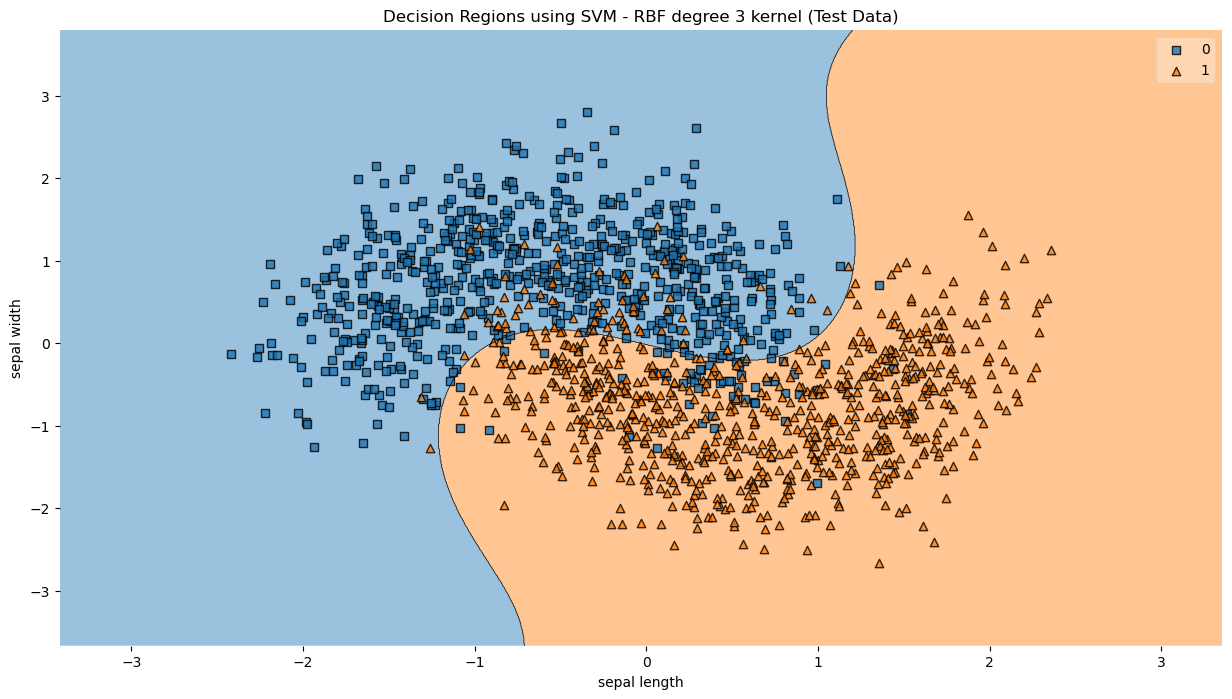

In [45]:
plot_decision_regions(X_test_scaled, y_test, clf = model_Rbf1)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Decision Regions using SVM - RBF degree 3 kernel (Test Data)');

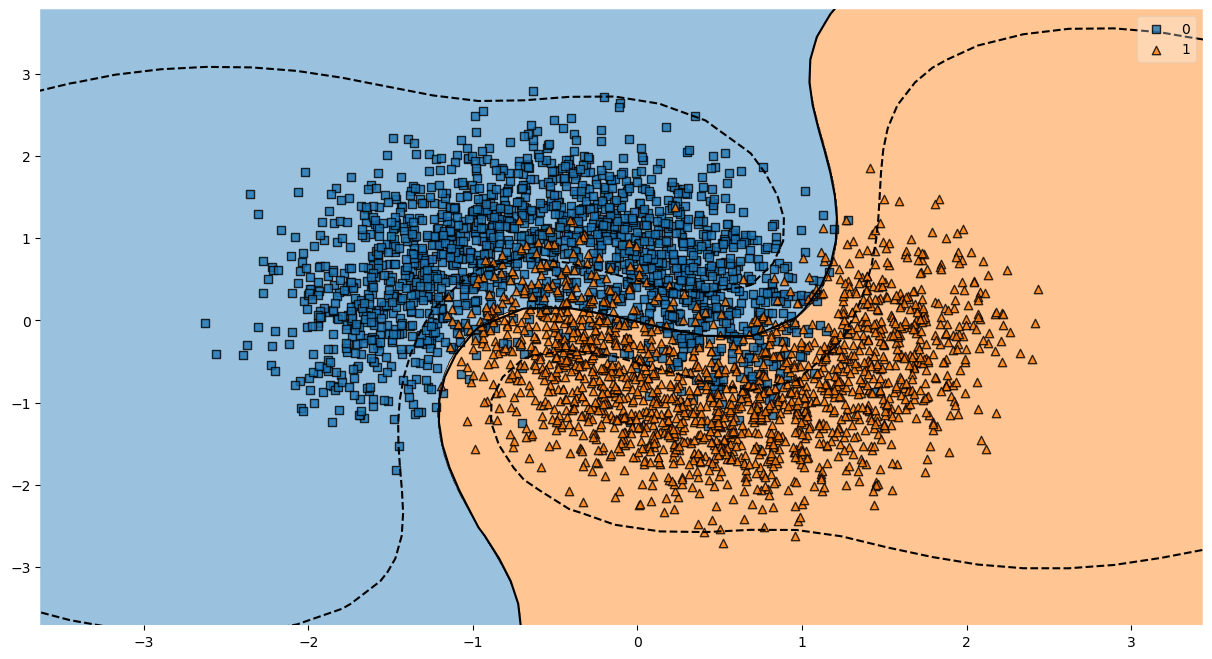

In [46]:
ax = plt.gca()
xx = np.linspace(-4, 4, 30)
yy = np.linspace(-4, 4, 30)

YY, XX = np.meshgrid(yy, xx)

xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = model_Rbf1.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors = 'k', levels = [-1, 0, 1], linestyles=["--", "-", "--"])

plot_decision_regions(X_train_scaled, y_train, clf = model_Rbf1);

In [47]:
model_rbf2 = SVC(kernel="rbf", gamma=100)
model_rbf2.fit(X_train_scaled, y_train)

SVC(gamma=100)

In [48]:
get_train_score(model_rbf2, train_data=X_train_scaled)

0.9305714285714286

In [49]:
get_test_score(model_rbf2, test_data=X_test_scaled)

0.912

In [50]:
model_rbf3 = SVC(kernel="rbf", gamma=500)
model_rbf3.fit(X_train_scaled, y_train)

SVC(gamma=500)

In [51]:
get_train_score(model_rbf3, train_data=X_train_scaled)

0.964

In [52]:
get_test_score(model_rbf3, test_data=X_test_scaled)

0.8773333333333333

In [53]:
model_rbf4 = SVC(kernel="rbf", gamma=250)
model_rbf4.fit(X_train_scaled, y_train)

SVC(gamma=250)

In [54]:
get_train_score(model_rbf4, train_data=X_train_scaled)

0.9474285714285714

In [55]:
get_test_score(model_rbf4, test_data=X_test_scaled)

0.898

In [56]:
df_rbf = pd.DataFrame(columns = ['Model', 'Kernel', 'gamma', 'train_accuracy_score', 'test_accuracy_score'])
df_rbf

,Model,Kernel,gamma,train_accuracy_score,test_accuracy_score


In [57]:
model_r1 = pd.Series({'Model': 'model_rbf1',
                     'Kernel': 'rbf',
                    'gamma':0.2,
                     'train_accuracy_score': accuracy_score(y_train, model_Rbf1.predict(X_train_scaled)),
                     'test_accuracy_score': accuracy_score(y_test, model_Rbf1.predict(X_test_scaled))
                   })

# append the values to the result table
df_rbf = df_rbf.append(model_r1, ignore_index = True)

# print the result table
df_rbf

,Model,Kernel,gamma,train_accuracy_score,test_accuracy_score
0,model_rbf1,rbf,0.2,0.901143,0.914667


In [58]:
model_r2 = pd.Series({'Model': 'model_rbf2',
                     'Kernel': 'rbf',
                    'gamma':100,
                     'train_accuracy_score': accuracy_score(y_train, model_rbf2.predict(X_train_scaled)),
                     'test_accuracy_score': accuracy_score(y_test, model_rbf2.predict(X_test_scaled))
                   })

# append the values to the result table
df_rbf = df_rbf.append(model_r2, ignore_index = True)

# print the result table
df_rbf

,Model,Kernel,gamma,train_accuracy_score,test_accuracy_score
0,model_rbf1,rbf,0.2,0.901143,0.914667
1,model_rbf2,rbf,100.0,0.930571,0.912000


In [59]:
model_r3 = pd.Series({'Model': 'model_rbf3',
                     'Kernel': 'rbf',
                    'gamma':500,
                     'train_accuracy_score': accuracy_score(y_train, model_rbf3.predict(X_train_scaled)),
                     'test_accuracy_score': accuracy_score(y_test, model_rbf3.predict(X_test_scaled))
                   })

# append the values to the result table
df_rbf = df_rbf.append(model_r3, ignore_index = True)

# print the result table
df_rbf

,Model,Kernel,gamma,train_accuracy_score,test_accuracy_score
0,model_rbf1,rbf,0.2,0.901143,0.914667
1,model_rbf2,rbf,100.0,0.930571,0.912000
2,model_rbf3,rbf,500.0,0.964000,0.877333


In [60]:
model_r4 = pd.Series({'Model': 'model_rbf4',
                     'Kernel': 'rbf',
                    'gamma':250,
                     'train_accuracy_score': accuracy_score(y_train, model_rbf4.predict(X_train_scaled)),
                     'test_accuracy_score': accuracy_score(y_test, model_rbf4.predict(X_test_scaled))
                   })

# append the values to the result table
df_rbf = df_rbf.append(model_r4, ignore_index = True)

# print the result table
df_rbf

,Model,Kernel,gamma,train_accuracy_score,test_accuracy_score
0,model_rbf1,rbf,0.2,0.901143,0.914667
1,model_rbf2,rbf,100.0,0.930571,0.912000
2,model_rbf3,rbf,500.0,0.964000,0.877333
3,model_rbf4,rbf,250.0,0.947429,0.898000


In [61]:
#Lets try with gamma = 1
model_rbf5 = SVC(kernel="rbf", gamma=1)
model_rbf5.fit(X_train_scaled, y_train)

SVC(gamma=1)

In [62]:
model_r5 = pd.Series({'Model': 'model_rbf5',
                     'Kernel': 'rbf',
                    'gamma':1,
                     'train_accuracy_score': accuracy_score(y_train, model_rbf5.predict(X_train_scaled)),
                     'test_accuracy_score': accuracy_score(y_test, model_rbf5.predict(X_test_scaled))
                   })

# append the values to the result table
df_rbf = df_rbf.append(model_r5, ignore_index = True)

# print the result table
df_rbf

,Model,Kernel,gamma,train_accuracy_score,test_accuracy_score
0,model_rbf1,rbf,0.2,0.901143,0.914667
1,model_rbf2,rbf,100.0,0.930571,0.912000
2,model_rbf3,rbf,500.0,0.964000,0.877333
3,model_rbf4,rbf,250.0,0.947429,0.898000
4,model_rbf5,rbf,1.0,0.911429,0.911333
